In [ ]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
import numpy as np
import pandas as pd
import re 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
sns.set_style('whitegrid')

Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl


In [ ]:
df1 = pd.read_csv('/content/Iris.csv')
df2 = pd.read_csv('/content/diabetes.csv')

In [ ]:
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df1.shape

(150, 6)

first question


In [ ]:
# standardize the data 
df = df1.iloc[:,1:-1]
df = (df-df.mean())/df.std()
print(df.mean())
print(df.std())

SepalLengthCm   -1.457168e-15
SepalWidthCm    -1.722511e-15
PetalLengthCm   -2.043551e-15
PetalWidthCm    -9.843977e-17
dtype: float64
SepalLengthCm    1.0
SepalWidthCm     1.0
PetalLengthCm    1.0
PetalWidthCm     1.0
dtype: float64


In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [ ]:
# now merging the last column with it
df['Species'] = df1.iloc[:,-1]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.897674,1.028611,-1.336794,-1.308593,Iris-setosa
1,-1.139200,-0.124540,-1.336794,-1.308593,Iris-setosa
2,-1.380727,0.336720,-1.393470,-1.308593,Iris-setosa
3,-1.501490,0.106090,-1.280118,-1.308593,Iris-setosa
4,-1.018437,1.259242,-1.336794,-1.308593,Iris-setosa


In [ ]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
mapping = {df.Species.unique()[i]:i for i in range(3)}

In [ ]:
df['species'] = list(map(lambda x:mapping[x] , df.Species))
df = df.drop('Species',axis=1)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,-0.897674,1.028611,-1.336794,-1.308593,0
1,-1.139200,-0.124540,-1.336794,-1.308593,0
2,-1.380727,0.336720,-1.393470,-1.308593,0
3,-1.501490,0.106090,-1.280118,-1.308593,0
4,-1.018437,1.259242,-1.336794,-1.308593,0


In [ ]:
x =df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
pca = PCA(0.90)
pca.fit(x)

PCA(n_components=0.9)

In [ ]:
pca.components_


array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

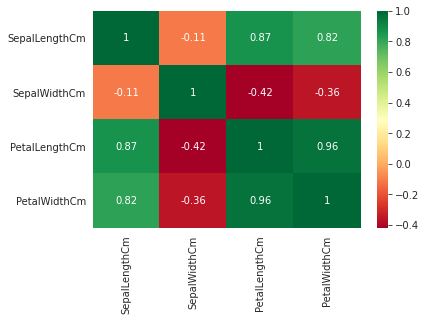

In [ ]:
# looking at first eigen vector we need to find the feature having maximum coefficient so in this case this is 3rd value
# so making correlation with all of these ( petal length cm)
sns.heatmap(df.iloc[:,:-1].corr(),annot=True,cmap='RdYlGn')

In [ ]:
pca.n_features_

4

In [ ]:
pca.singular_values_

array([20.82575075, 11.71588318])

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
x1 = pca.transform(x)

In [ ]:
x1

array([[-2.25698063e+00,  5.04015404e-01],
       [-2.07945912e+00, -6.53216394e-01],
       [-2.36004408e+00, -3.17413945e-01],
       [-2.29650366e+00, -5.73446613e-01],
       [-2.38080159e+00,  6.72514411e-01],
       [-2.06362348e+00,  1.51347827e+00],
       [-2.43754534e+00,  7.43137171e-02],
       [-2.22638327e+00,  2.46787172e-01],
       [-2.33413810e+00, -1.09148977e+00],
       [-2.18136797e+00, -4.47131117e-01],
       [-2.15626287e+00,  1.06702096e+00],
       [-2.31960686e+00,  1.58057946e-01],
       [-2.21665672e+00, -7.06750478e-01],
       [-2.63090249e+00, -9.35149145e-01],
       [-2.18497165e+00,  1.88366805e+00],
       [-2.24394778e+00,  2.71328133e+00],
       [-2.19539570e+00,  1.50869601e+00],
       [-2.18286636e+00,  5.12587094e-01],
       [-1.88775015e+00,  1.42633236e+00],
       [-2.33213620e+00,  1.15416686e+00],
       [-1.90816387e+00,  4.29027880e-01],
       [-2.19728429e+00,  9.49277150e-01],
       [-2.76490710e+00,  4.87882574e-01],
       [-1.

In [ ]:
df_pca = pd.DataFrame(columns = ['pc1','pc2','target'],data = np.array([x1[:,0],x1[:,1],df.species]).T)
df_pca.head()

,pc1,pc2,target
0,-2.256981,0.504015,0.0
1,-2.079459,-0.653216,0.0
2,-2.360044,-0.317414,0.0
3,-2.296504,-0.573447,0.0
4,-2.380802,0.672514,0.0


In [ ]:
x_trn2,x_tst2,y_trn2,y_tst2 = train_test_split(df_pca.iloc[:,:-1],df_pca.iloc[:,-1],test_size=20,random_state = 0)


In [ ]:
clf1 = GaussianNB() # for whole dataset
clf1.fit(x_trn2,y_trn2)
print('accuracy score is : ',clf1.score(x_tst2,y_tst2))

accuracy score is :  0.85


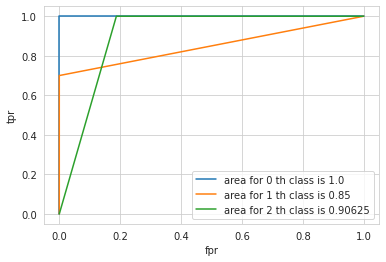

In [ ]:
from sklearn.metrics import *
binar1 = label_binarize(np.array(y_tst2),classes = np.unique(df_pca.iloc[:,-1]))
binar2 = label_binarize(np.array(clf1.predict(x_tst2)),classes = np.unique(df_pca.iloc[:,-1]))
n_classes = binar1.shape[1]
fpr = dict()
tpr = dict()
auc_ = dict()
for i in range(n_classes):
  fpr[i],tpr[i] ,_ = roc_curve(binar1[:,i],binar2[:,i])
  auc_[i] = auc(fpr[i],tpr[i])
for i in range(n_classes):
  plt.plot(fpr[i],tpr[i],label = f'area for {i} th class is {auc_[i]}')
  plt.legend()
  plt.xlabel('fpr')
  plt.ylabel('tpr')
plt.show()

In [ ]:
print('no of eigen vectors needed: ',len(pca.components_))

no of eigen vectors needed:  2


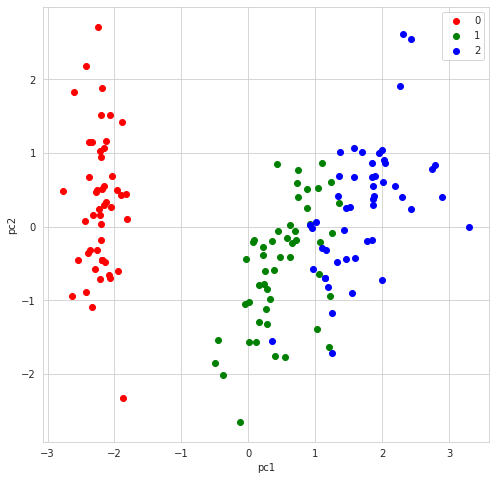

In [ ]:
plt.figure(figsize=(8,8))
p1 = df_pca.loc[df_pca.target == 0,['pc1','pc2']]
p2 = df_pca.loc[df_pca.target == 1,['pc1','pc2']]
p3 = df_pca.loc[df_pca.target == 2,['pc1','pc2']]
plt.scatter(x = p1.pc1,y=p1.pc2,c = 'r',label='0')
plt.scatter(x = p2.pc1,y=p2.pc2,c = 'g',label='1')
plt.scatter(x = p3.pc1,y=p3.pc2,c = 'b',label='2')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()

second question


In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,-0.897674,1.028611,-1.336794,-1.308593,0
1,-1.139200,-0.124540,-1.336794,-1.308593,0
2,-1.380727,0.336720,-1.393470,-1.308593,0
3,-1.501490,0.106090,-1.280118,-1.308593,0
4,-1.018437,1.259242,-1.336794,-1.308593,0


In [ ]:
clf = LDA(n_components=2)
x2 = clf.fit(df.iloc[:,:-1],df.iloc[:,-1]).transform(df.iloc[:,:-1])
x2

array([[ 8.0849532 ,  0.32845422],
       [ 7.1471629 , -0.75547326],
       [ 7.51137789, -0.23807832],
       [ 6.83767561, -0.64288476],
       [ 8.15781367,  0.54063935],
       [ 7.72363087,  1.48232345],
       [ 7.23514662,  0.3771537 ],
       [ 7.62974497,  0.01667246],
       [ 6.58274132, -0.98737424],
       [ 7.36884116, -0.91362729],
       [ 8.42181434,  0.67622968],
       [ 7.24739721, -0.08292417],
       [ 7.35062105, -1.0393597 ],
       [ 7.59646896, -0.77671553],
       [ 9.86936588,  1.61486093],
       [ 9.18033614,  2.75558626],
       [ 8.59760709,  1.85442217],
       [ 7.7995682 ,  0.60905468],
       [ 8.1000091 ,  0.99610981],
       [ 8.04543611,  1.16244332],
       [ 7.52046427, -0.156233  ],
       [ 7.60526378,  1.22757267],
       [ 8.70408249,  0.89959416],
       [ 6.26374139,  0.46023935],
       [ 6.59191505, -0.36199821],
       [ 6.79210164, -0.93823664],
       [ 6.84048091,  0.4848487 ],
       [ 7.948386  ,  0.23871551],
       [ 8.01209273,

In [ ]:
clf.coef_

array([[  5.1722802 ,   5.30984258, -29.70831285, -16.13110665],
       [ -1.25590187,  -1.89390375,   8.20424733,   2.43173992],
       [ -3.91637833,  -3.41593882,  21.50406552,  13.69936673]])

In [ ]:
clf.explained_variance_ratio_

array([0.99147248, 0.00852752])

In [ ]:
df_lda =  pd.DataFrame(columns = ['lda1','lda2','target'],data = np.array([x2[:,0],x2[:,1],df.species]).T)
df_lda.head()

,lda1,lda2,target
0,8.084953,0.328454,0.0
1,7.147163,-0.755473,0.0
2,7.511378,-0.238078,0.0
3,6.837676,-0.642885,0.0
4,8.157814,0.540639,0.0


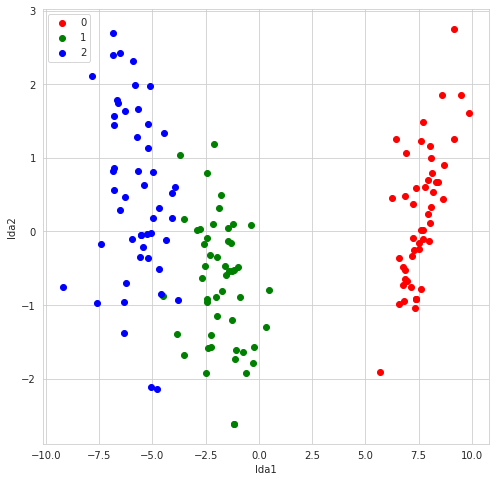

In [ ]:
plt.figure(figsize=(8,8))
l1 = df_lda.loc[df_lda.target == 0,['lda1','lda2']]
l2 = df_lda.loc[df_lda.target == 1,['lda1','lda2']]
l3 = df_lda.loc[df_lda.target == 2,['lda1','lda2']]
plt.scatter(x =l1.lda1,y=l1.lda2,c = 'r',label='0')
plt.scatter(x = l2.lda1,y=l2.lda2,c = 'g',label='1')
plt.scatter(x = l3.lda1,y=l3.lda2,c = 'b',label='2')
plt.xlabel('lda1')
plt.ylabel('lda2')
plt.legend()
plt.show()

In [ ]:
x_trn,x_tst,y_trn,y_tst = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=20,random_state = 0)
x_trn1,x_tst1,y_trn1,y_tst1 = train_test_split(df_lda.iloc[:,:-1],df_lda.iloc[:,-1],test_size=20,random_state = 0)


In [ ]:
clf1 = GaussianNB() # for whole dataset
clf1.fit(x_trn,y_trn)
print('accuracy score is : ',clf1.score(x_tst,y_tst))

accuracy score is :  0.95


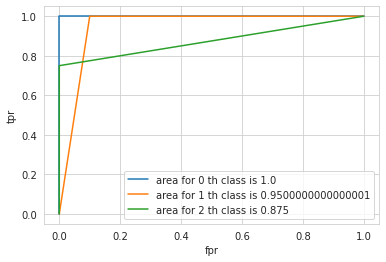

In [ ]:
binar1 = label_binarize(np.array(y_tst),classes = np.unique(df_pca.iloc[:,-1]))
binar2 = label_binarize(np.array(clf1.predict(x_tst)),classes = np.unique(df_pca.iloc[:,-1]))
n_classes = binar1.shape[1]
fpr = dict()
tpr = dict()
auc_ = dict()
for i in range(n_classes):
  fpr[i],tpr[i] ,_ = roc_curve(binar1[:,i],binar2[:,i])
  auc_[i] = auc(fpr[i],tpr[i])
for i in range(n_classes):
  plt.plot(fpr[i],tpr[i],label = f'area for {i} th class is {auc_[i]}')
  plt.legend()
  plt.xlabel('fpr')
  plt.ylabel('tpr')
plt.show()

In [ ]:
clf2 = GaussianNB() # after lda
clf2.fit(x_trn1,y_trn1)
print('accuracy score is : ',clf2.score(x_tst1,y_tst1))

accuracy score is :  1.0


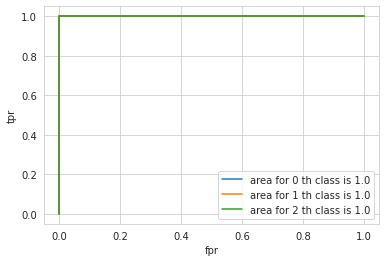

In [ ]:
binar1 = label_binarize(np.array(y_tst1),classes = np.unique(df_pca.iloc[:,-1]))
binar2 = label_binarize(np.array(clf2.predict(x_tst1)),classes = np.unique(df_pca.iloc[:,-1]))
n_classes = binar1.shape[1]
fpr = dict()
tpr = dict()
auc_ = dict()
for i in range(n_classes):
  fpr[i],tpr[i] ,_ = roc_curve(binar1[:,i],binar2[:,i])
  auc_[i] = auc(fpr[i],tpr[i])
for i in range(n_classes):
  plt.plot(fpr[i],tpr[i],label = f'area for {i} th class is {auc_[i]}')
  plt.legend()
  plt.xlabel('fpr')
  plt.ylabel('tpr')
plt.show()

Third question


In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df2.shape

(768, 9)

In [ ]:
df2.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
duplicate_df = df2.copy() 
dict_1 = {0:"#FF0000",1:"#000000"}
duplicate_df['color'] = list(map(lambda x :dict_1[x],duplicate_df['Outcome']))
duplicate_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,color
0,6,148,72,35,0,33.6,0.627,50,1,#000000
1,1,85,66,29,0,26.6,0.351,31,0,#FF0000
2,8,183,64,0,0,23.3,0.672,32,1,#000000
3,1,89,66,23,94,28.1,0.167,21,0,#FF0000
4,0,137,40,35,168,43.1,2.288,33,1,#000000


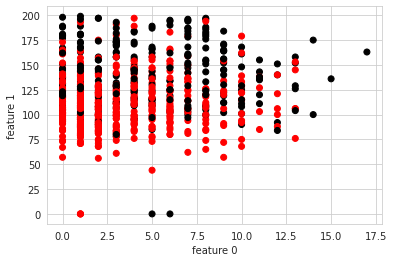

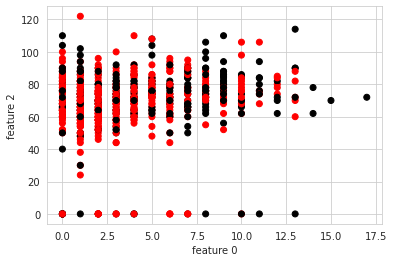

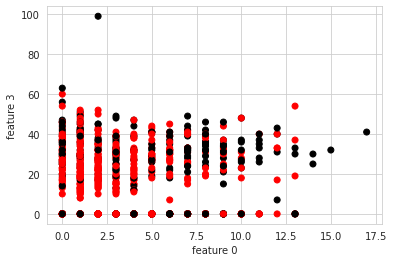

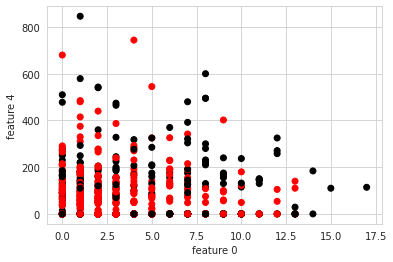

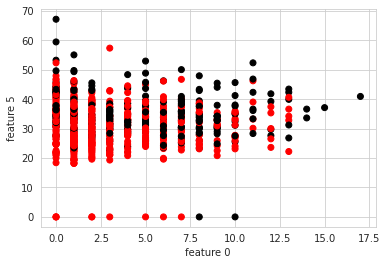

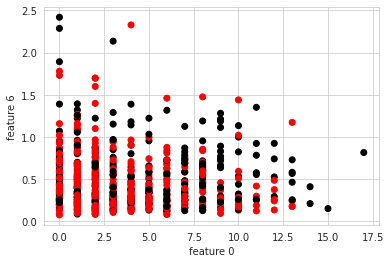

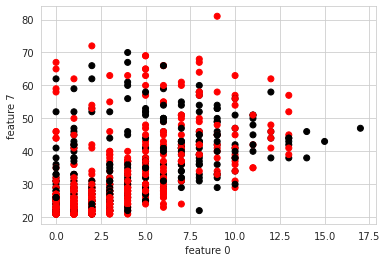

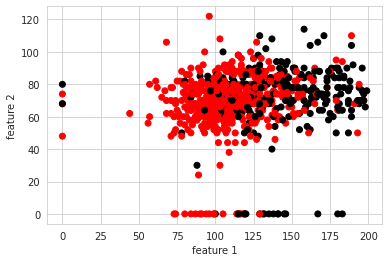

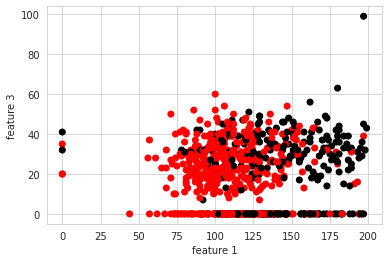

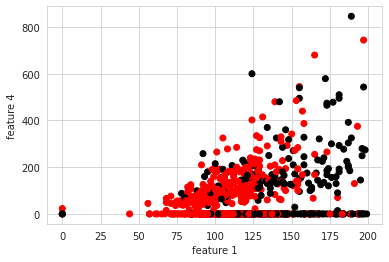

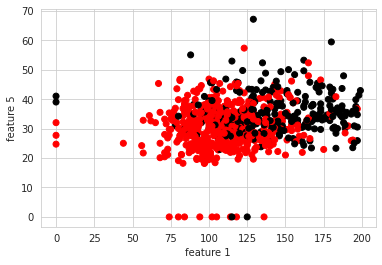

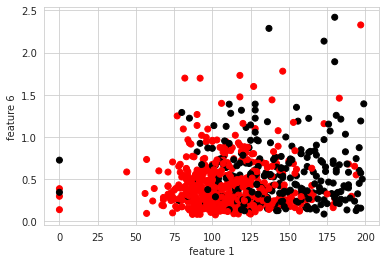

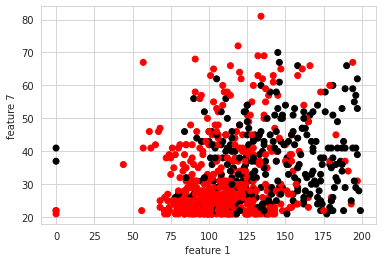

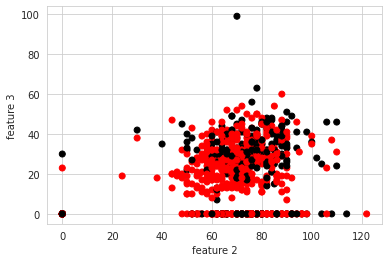

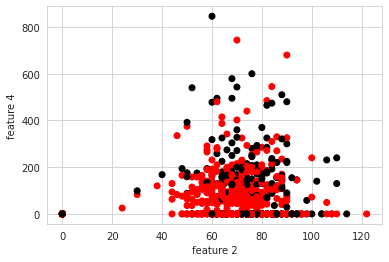

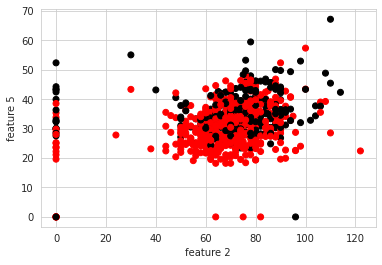

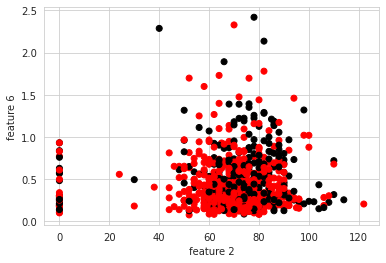

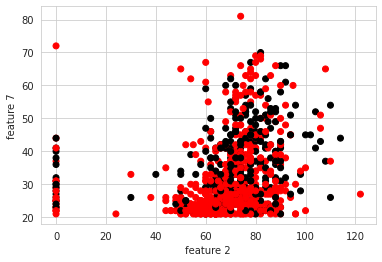

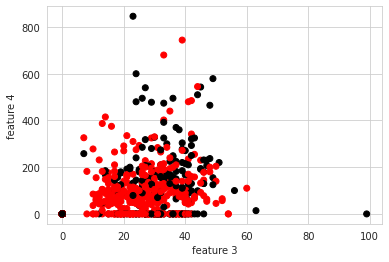

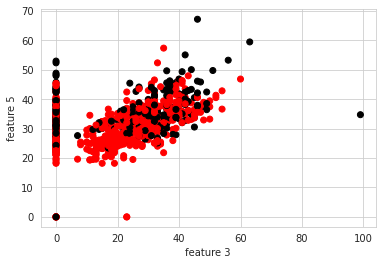

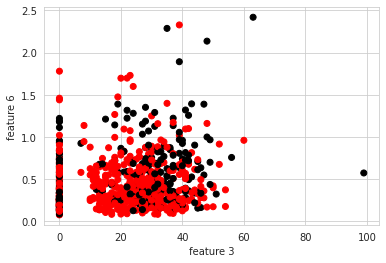

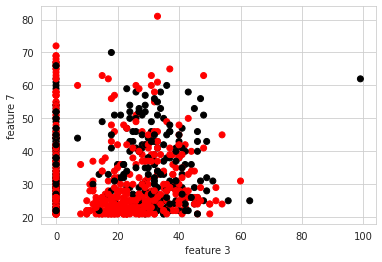

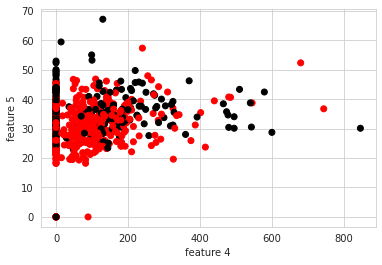

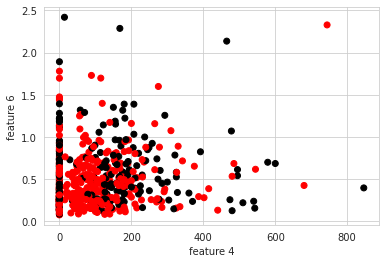

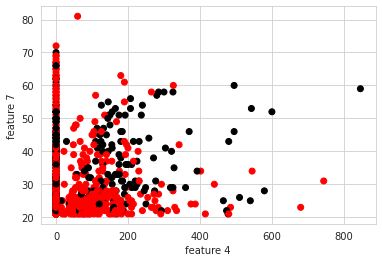

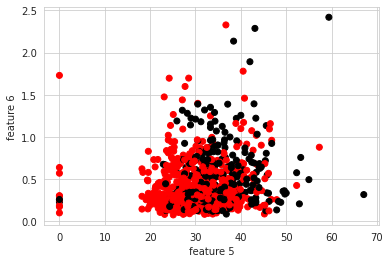

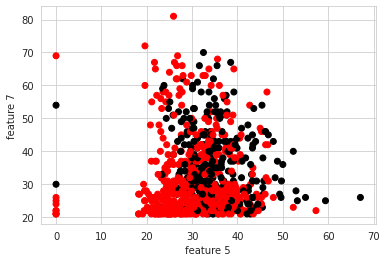

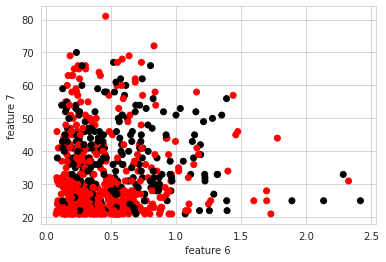

In [ ]:
from itertools import combinations
l = combinations([i for i in range(8)],2)

for i, j in list(l):
  plt.scatter(duplicate_df.iloc[:,i],duplicate_df.iloc[:,j],c=duplicate_df.color)
  plt.xlabel(f'feature {i}')
  plt.ylabel(f'feature {j}')
  plt.show()

In [ ]:
np.unique(df2.Pregnancies)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17])

In [ ]:
np.unique(df2.Outcome) # => 2 class classification problem

array([0, 1])

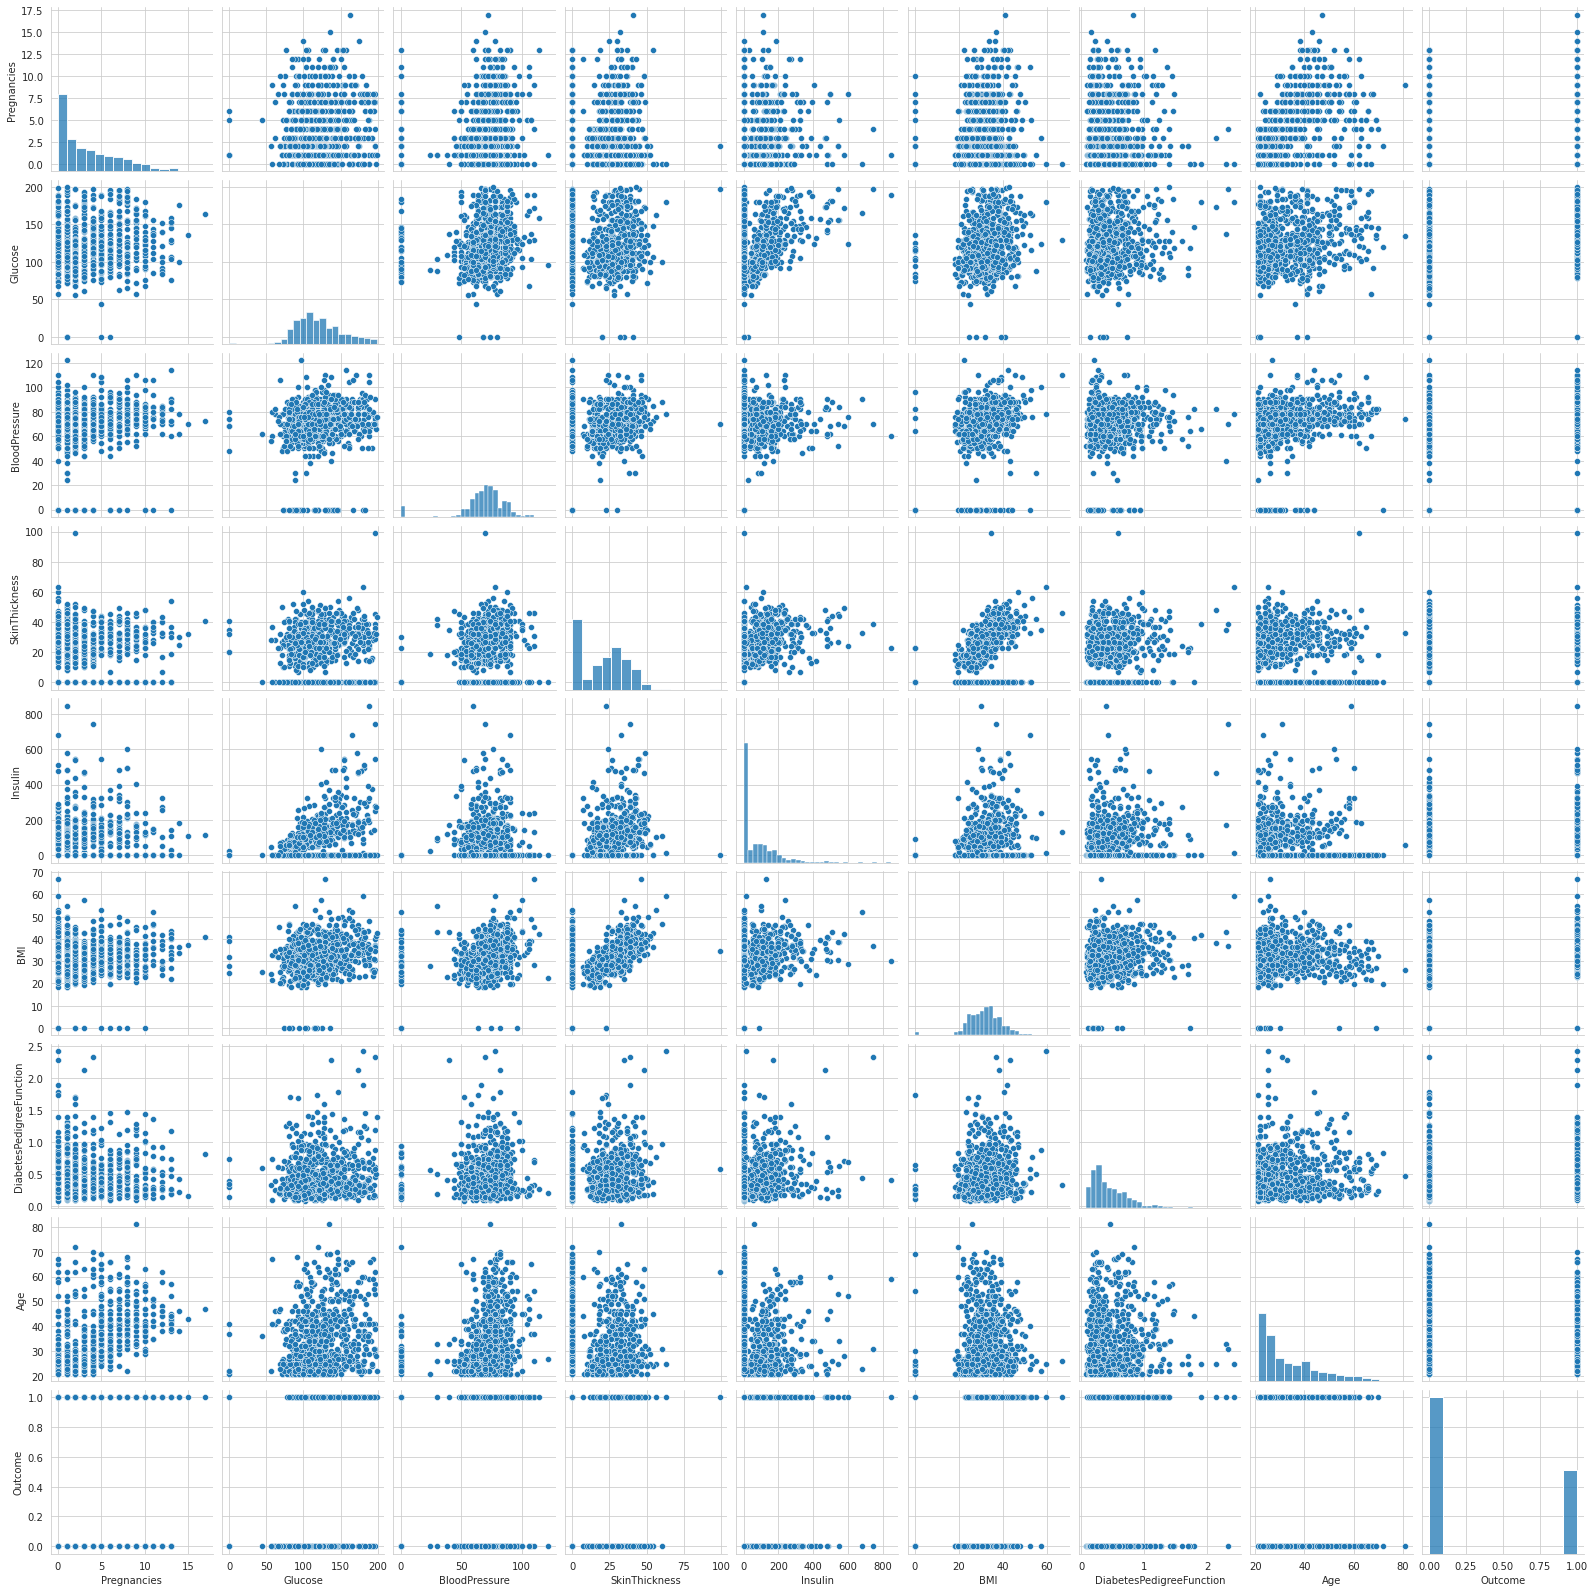

In [ ]:
sns.pairplot(df2)

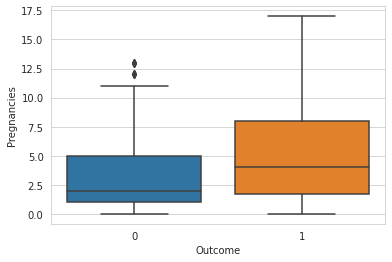

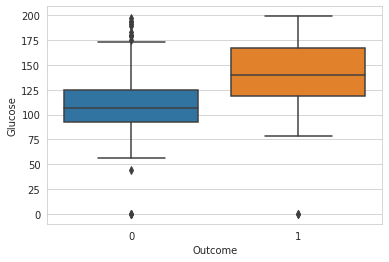

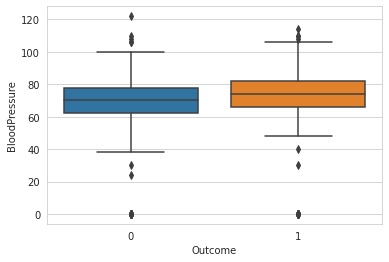

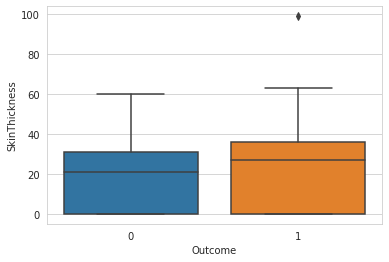

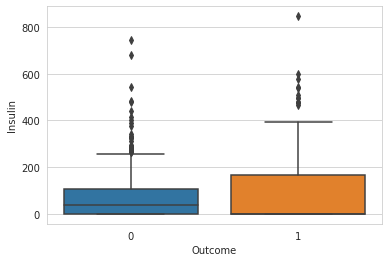

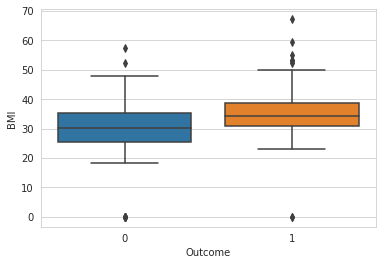

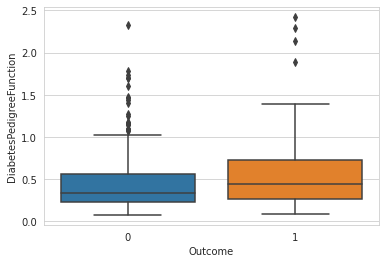

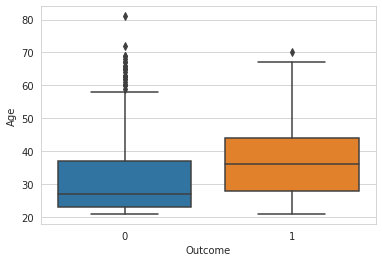

In [ ]:
for i in df2.keys()[:-1]:
  sns.boxplot(y=f'{i}',x='Outcome',data=df2)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


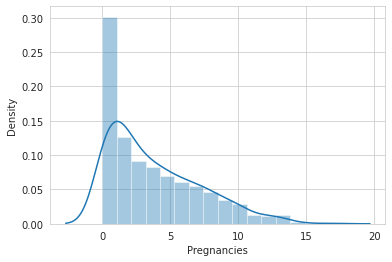

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


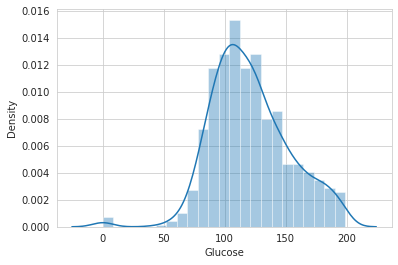

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


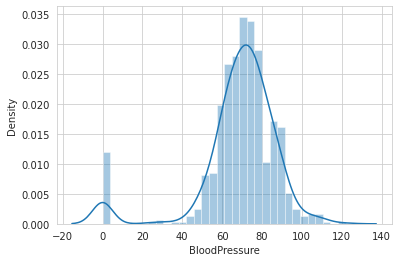

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


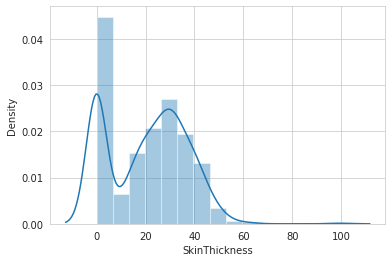

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


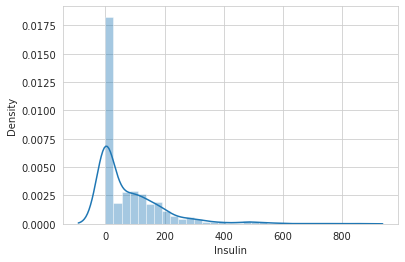

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


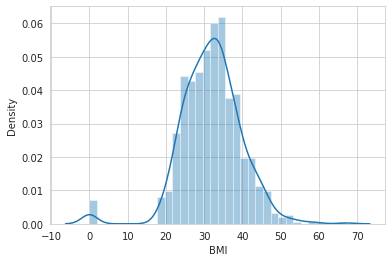

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


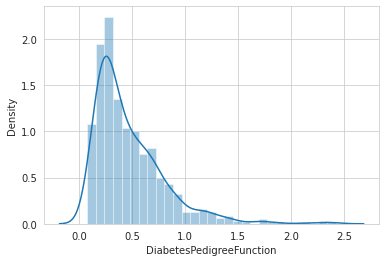

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


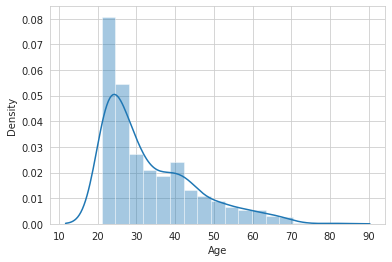

In [ ]:
for i in df2.keys()[:-1]:
  sns.distplot(df2[i])
  plt.show()

In [ ]:
addlist = df2.Outcome
df2 = df2.drop('Outcome',axis=1)
df2 =(df2-df2.mean())/df2.std()
df2['Outcome'] = addlist
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1


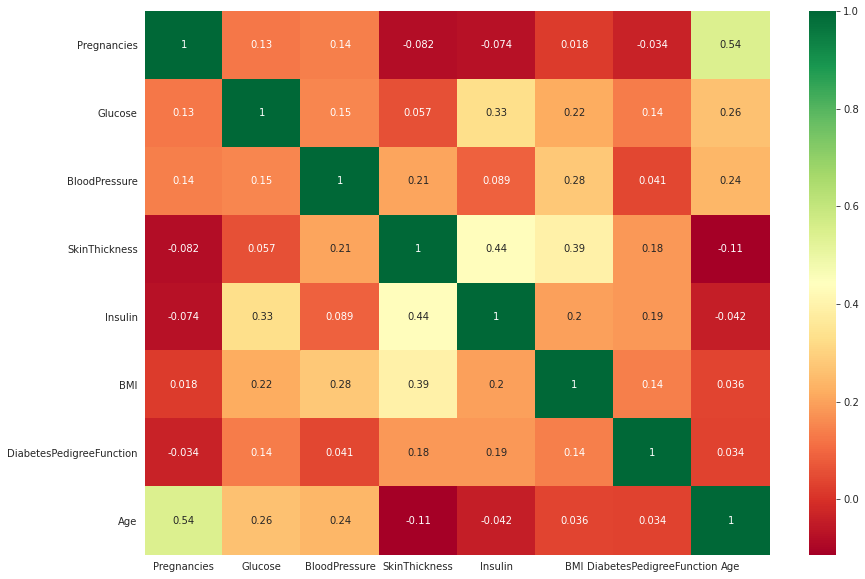

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(data=df2.iloc[:,:-1].corr(),cmap='RdYlGn',annot=True)

In [ ]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score,accuracy_score



In [ ]:
# feature selection

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,0
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,0
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import sklearn 
sklearn.__version__

'0.24.2'

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector # to import this sklearn version should be 0.24
fs1 = SequentialFeatureSelector(estimator = RandomForestClassifier(),direction='forward')
fs1.fit(df2.iloc[:,:-1],df2.iloc[:,-1])

SequentialFeatureSelector(estimator=RandomForestClassifier())

In [ ]:
abc = fs1.transform(df2.iloc[:,:-1])

In [ ]:
fs1.n_features_to_select_

4

In [ ]:
support1 = fs1.support_

In [ ]:
abc

array([[ 0.63953049,  0.84777132,  0.20387991,  1.42506672],
       [-0.84433482, -1.12266474, -0.68397621, -0.19054773],
       [ 1.23307662,  1.94245802, -1.10253696, -0.10551539],
       ...,
       [ 0.34275743,  0.00329872, -0.73471085, -0.27558007],
       [-0.84433482,  0.15968254, -0.24004815,  1.1699697 ],
       [-0.84433482, -0.87245064, -0.20199718, -0.87080644]])

In [ ]:
fs2 = SequentialFeatureSelector(estimator = RandomForestClassifier(),direction='backward')
fs2.fit(df2.iloc[:,:-1],df2.iloc[:,-1])

SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestClassifier())

In [ ]:
deg = fs2.transform(df2.iloc[:,:-1])

In [ ]:
fs2.n_features_to_select_

4

In [ ]:
support2 = fs2.support_

In [ ]:
deg

array([[ 0.84777132,  0.20387991,  0.46818687,  1.42506672],
       [-1.12266474, -0.68397621, -0.36482303, -0.19054773],
       [ 1.94245802, -1.10253696,  0.6040037 , -0.10551539],
       ...,
       [ 0.00329872, -0.73471085, -0.68474712, -0.27558007],
       [ 0.15968254, -0.24004815, -0.37085933,  1.1699697 ],
       [-0.87245064, -0.20199718, -0.4734765 , -0.87080644]])

In [ ]:
df2.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
feature_ind = list(map(lambda x : x[0] if (x[1]==True) else -1 ,enumerate(support1)))
feature_ind = list(filter(lambda x: x !=-1 , feature_ind))
feature_ind

[0, 1, 5, 7]

In [ ]:
feature_ind1 = list(map(lambda x : x[0] if (x[1]==True) else -1 ,enumerate(support2)))
feature_ind1 = list(filter(lambda x: x !=-1 , feature_ind1))
feature_ind1

[1, 5, 6, 7]

In [ ]:
print('feature with high significance using forward method : ',[df2.iloc[:,:-1].keys()[i] for i in feature_ind])

feature with high significance using forward method :  ['Pregnancies', 'Glucose', 'BMI', 'Age']


In [ ]:
print('feature with high significance using backward method : ',[df2.iloc[:,:-1].keys()[i] for i in feature_ind1])

feature with high significance using backward method :  ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
dataFrame1 = df2.iloc[:,feature_ind]
dataFrame1.head()

,Pregnancies,Glucose,BMI,Age
0,0.639530,0.847771,0.203880,1.425067
1,-0.844335,-1.122665,-0.683976,-0.190548
2,1.233077,1.942458,-1.102537,-0.105515
3,-0.844335,-0.997558,-0.493721,-1.040871
4,-1.141108,0.503727,1.408828,-0.020483


In [ ]:
dataFrame2 = df2.iloc[:,feature_ind1]
dataFrame2.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.847771,0.203880,0.468187,1.425067
1,-1.122665,-0.683976,-0.364823,-0.190548
2,1.942458,-1.102537,0.604004,-0.105515
3,-0.997558,-0.493721,-0.920163,-1.040871
4,0.503727,1.408828,5.481337,-0.020483


In [ ]:
clf1 = RandomForestClassifier()
clf2 = RandomForestClassifier()
clf3 = RandomForestClassifier()
from sklearn.metrics import roc_curve,auc

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(df2.iloc[:,:-1],df2.iloc[:,-1],test_size=100,random_state = 0)
x_train2,x_test2,y_train2,y_test2 = train_test_split(dataFrame1,df2.iloc[:,-1],test_size=100,random_state = 0)
x_train3,x_test3,y_train3,y_test3 = train_test_split(dataFrame2,df2.iloc[:,-1],test_size=100,random_state = 0)

In [ ]:
# all features
clf1.fit(x_train1,y_train1)
a1 = clf1.predict(x_test1)
print("f1_score : ",f1_score(a1,y_test1))
print("accuracy _score : ",accuracy_score(a1,y_test1))

f1_score :  0.6557377049180327
accuracy _score :  0.79


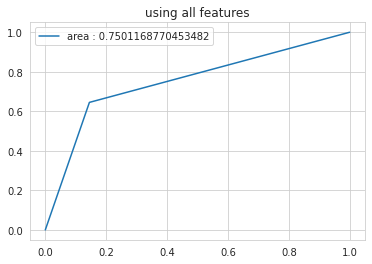

In [ ]:
fpr , tpr , _ = roc_curve(y_test1,a1)
plt.plot(fpr,tpr,label=f'area : {auc(fpr,tpr)}')
plt.title('using all features')
plt.legend()
plt.show()

In [ ]:
# forward feature selection
clf2.fit(x_train2,y_train2)
a2 = clf2.predict(x_test2)
print("f1_score : ",f1_score(a2,y_test2))
print("accuracy _score : ",accuracy_score(a2,y_test2))

f1_score :  0.6666666666666667
accuracy _score :  0.79


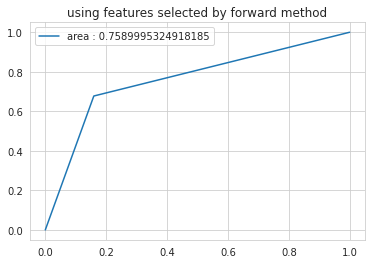

In [ ]:
fpr , tpr , _ = roc_curve(y_test2,a2)
plt.plot(fpr,tpr,label=f'area : {auc(fpr,tpr)}')
plt.title('using features selected by forward method')
plt.legend()
plt.show()

In [ ]:
# backward feature selection
clf3.fit(x_train3,y_train3)
a3 = clf3.predict(x_test3)
print("f1_score : ",f1_score(a3,y_test3))
print("accuracy _score : ",accuracy_score(a3,y_test3))

f1_score :  0.6333333333333333
accuracy _score :  0.78


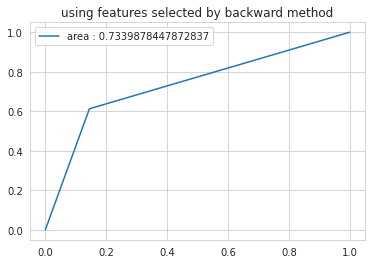

In [ ]:
fpr , tpr , _ = roc_curve(y_test3,a3)
plt.plot(fpr,tpr,label=f'area : {auc(fpr,tpr)}')
plt.title('using features selected by backward method')
plt.legend()
plt.show()

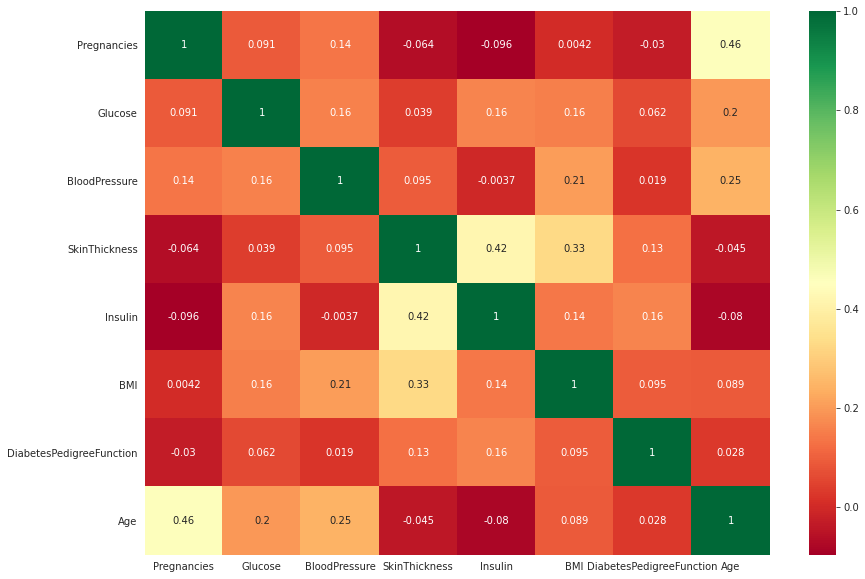

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(data=df2.iloc[:,:-1].corr(method='kendall'),cmap='RdYlGn',annot=True)

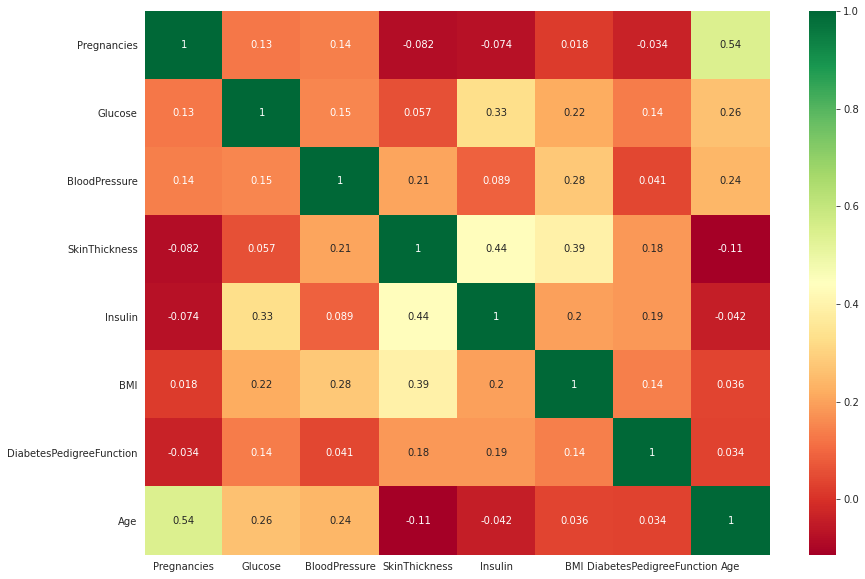

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(data=df2.iloc[:,:-1].corr(),cmap='RdYlGn',annot=True)

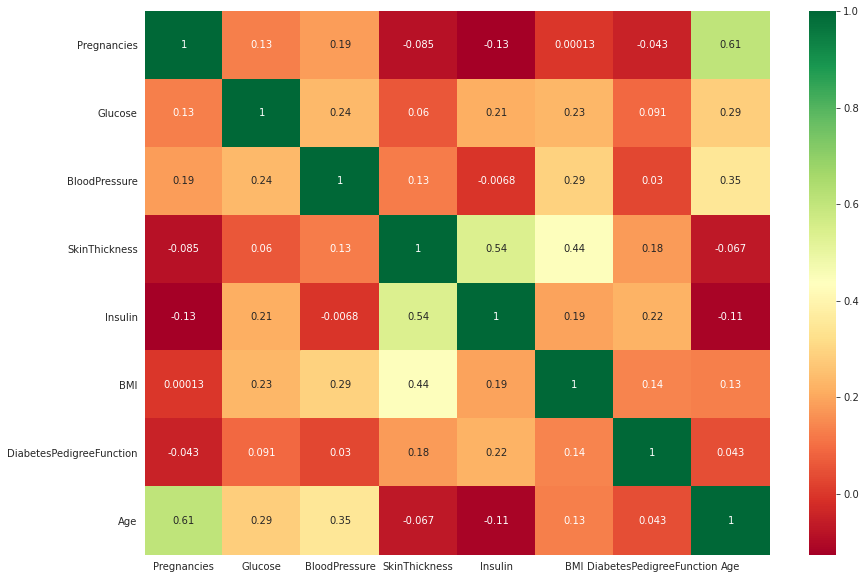

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(data=df2.iloc[:,:-1].corr(method='spearman'),cmap='RdYlGn',annot=True)

In [ ]:
def correlation(dataset,thresh , method):
  corr_mat = dataset.corr(method=method)
  cor = set()
  for i in range(len(corr_mat.columns)):
    for j in range(i):
      if( abs(corr_mat.iloc[i,j] > thresh)):
        cor.add(corr_mat.columns[i])
  return cor



In [ ]:
feat1 = list(correlation(df2.iloc[:,:-1],0.4,'pearson'))

In [ ]:
feature2 = correlation(df2.iloc[:,:-1],0.5,'spearman')

In [ ]:
copy_df = df2.copy()
copy_df = copy_df.drop(feat1,axis=1)

In [ ]:
copy_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome
0,0.639530,0.847771,0.149543,0.906679,0.203880,0.468187,1
1,-0.844335,-1.122665,-0.160441,0.530556,-0.683976,-0.364823,0
2,1.233077,1.942458,-0.263769,-1.287373,-1.102537,0.604004,1
3,-0.844335,-0.997558,-0.160441,0.154433,-0.493721,-0.920163,0
4,-1.141108,0.503727,-1.503707,0.906679,1.408828,5.481337,1


In [ ]:
xtrn,xtst,ytrn,ytst = train_test_split(copy_df.iloc[:,:-1],copy_df.iloc[:,-1],test_size=100,random_state = 0)
lastclf = RandomForestClassifier()
lastclf.fit(xtrn,ytrn)
pred = lastclf.predict(xtst)
print('the accuracy is : ', accuracy_score(ytst,pred))

the accuracy is :  0.79


In [ ]:
correlation(df2.iloc[:,:-1],0.7,'pearson') # so this is empty that means no two features are more than 0.7 % correlated hence we are not leaving any feature

set()

In [ ]:
def cool_plot(method):
  l = []
  for i in np.arange(0.3,0.8,0.1):
   feat1 = list(correlation(df2.iloc[:,:-1],i,method))
   if (len(feat1)!=0):
     copy_df = df2.copy()
     copy_df = copy_df.drop(feat1,axis=1)
     xtrn,xtst,ytrn,ytst = train_test_split(copy_df.iloc[:,:-1],copy_df.iloc[:,-1],test_size=100,random_state = 0)
     lastclf = RandomForestClassifier()
     lastclf.fit(xtrn,ytrn)
     pred = lastclf.predict(xtst)
     yrt = accuracy_score(ytst,pred)
     l.append((i,yrt))
     print('the accuracy is : ', yrt)
   else:
     xtrn,xtst,ytrn,ytst = train_test_split(df2.iloc[:,:-1],df2.iloc[:,-1],test_size=100,random_state = 0)
     lastclf = RandomForestClassifier()
     lastclf.fit(xtrn,ytrn)
     pred = lastclf.predict(xtst)
     yrt = accuracy_score(ytst,pred)
     l.append((i,yrt))
     print('the accuracy is : ', yrt)
  t = []
  m = []
  for i , j in l:
    t.append(i)
    m.append(j)
  plt.plot(t,m)
  plt.xlabel('threshold')
  plt.ylabel("accuracy")
  plt.show()

the accuracy is :  0.8
the accuracy is :  0.77
the accuracy is :  0.78
the accuracy is :  0.79
the accuracy is :  0.8


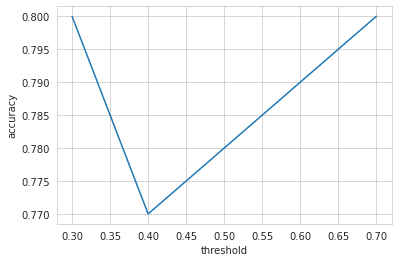

In [ ]:
cool_plot('pearson')

the accuracy is :  0.78
the accuracy is :  0.79
the accuracy is :  0.77
the accuracy is :  0.77
the accuracy is :  0.79


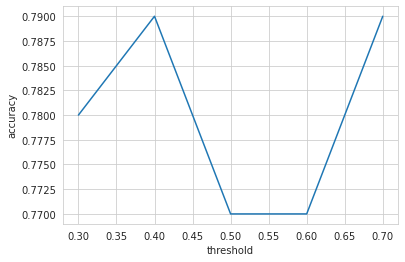

In [ ]:
cool_plot('spearman')

the accuracy is :  0.78
the accuracy is :  0.76
the accuracy is :  0.81
the accuracy is :  0.81
the accuracy is :  0.81


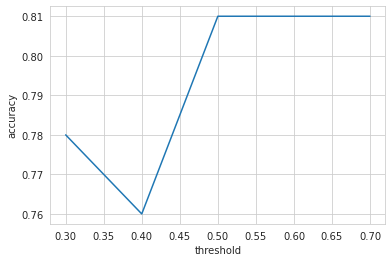

In [ ]:
cool_plot('kendall')